In [9]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np

# 데이터 로드 (이미 로드한 상태에서 진행)
train_data = pd.read_csv('train.csv')

# 라벨 인코딩
train_data['preferred_difficulty_level'] = train_data['preferred_difficulty_level'].apply(lambda x : 1 if x == 'Medium' else 0)
train_data['subscription_type'] = train_data['subscription_type'].astype('category').cat.codes
train_data['total_completed_courses'] = train_data['total_completed_courses'].apply(lambda x : 1 if x >= 2 else 0)
# train_data['next_sub'] = np.where((train_data['recent_login_time'] >= 20) & (train_data['payment_pattern'].isin([0,2,4,6])), 0, 1)

# 피처와 목표 변수 설정
features = train_data.drop(['user_id', 'target','subscription_duration','recent_login_time',
                      'average_login_time',
                      'abandoned_learning_sessions','payment_pattern'], axis=1)
target = train_data['target']

# 상관 행렬 계산
correlation_matrix = pd.concat([features, target], axis=1).corr()

# 목표 변수와의 상관 관계만 추출
target_correlation = correlation_matrix['target'].drop('target')

# 결과 출력
print("목표 변수와 피처 간의 상관 관계:")
print(target_correlation)


목표 변수와 피처 간의 상관 관계:
average_time_per_learning_session    0.118261
monthly_active_learning_days         0.004876
total_completed_courses              0.012771
recent_learning_achievement          0.002294
community_engagement_level           0.009641
preferred_difficulty_level           0.020817
subscription_type                    0.009824
customer_inquiry_history             0.000277
Name: target, dtype: float64


/Users/kbsu/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kbsu/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kbsu/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kbsu/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47148 (\N{HANGUL SYLLABLE RYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kbsu/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from curren

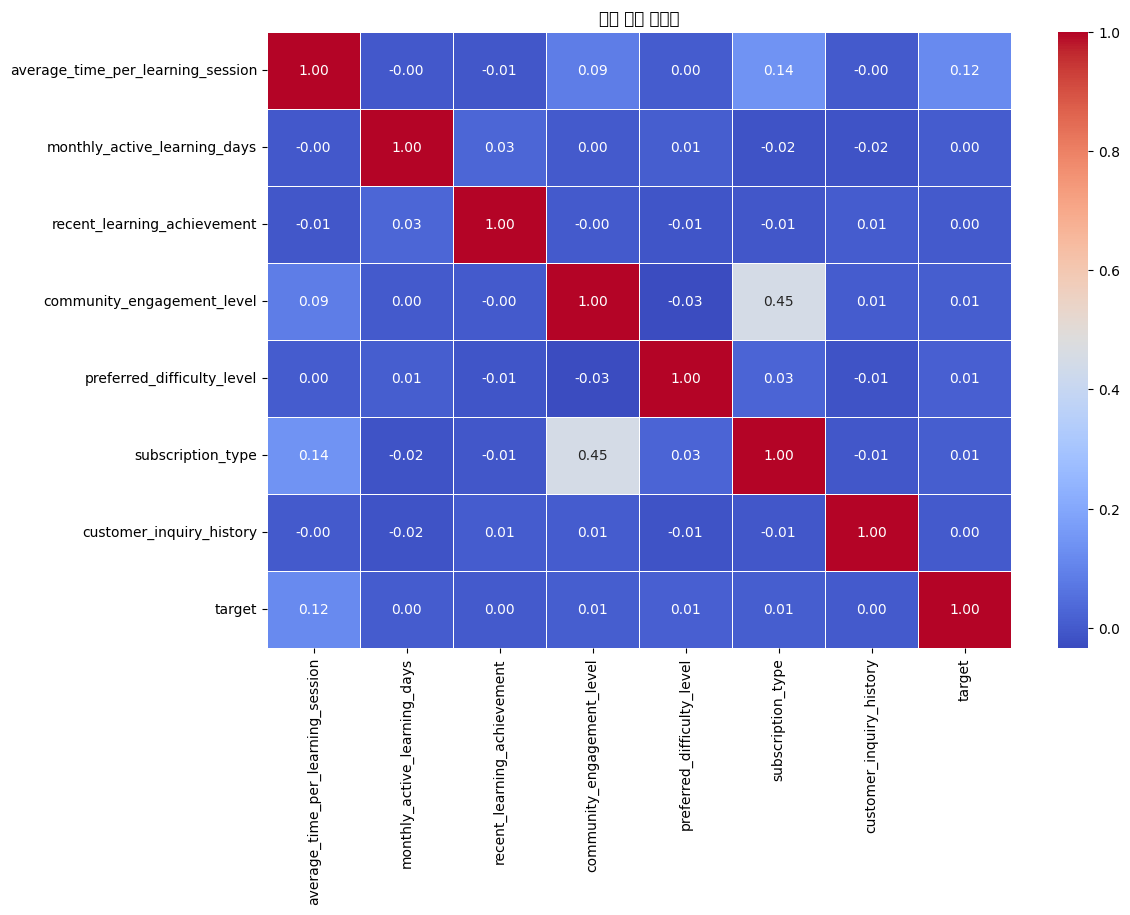

In [12]:
# 상관 관계 시각화 (옵션)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("상관 행렬 시각화")
plt.show()